# DER

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import polars as pl
import scipy

In [29]:
def graficar_diagrama_er_atributos(relations_with_cardinality: List[Tuple[str, str, str]], 
                                  attributes: Dict[str, List[str]] = {},
                                  layout_type: str = "spring") -> None:
        
    # Extraer entidades de las relaciones
    entidades = list(set([item[0] for item in relations_with_cardinality] + [item[1] for item in relations_with_cardinality]))
    
    # Crear un grafo con cardinalidades
    G = nx.DiGraph()
    G.add_nodes_from(entidades)
    G.add_edges_from((item[0], item[1], {'label': item[2]}) for item in relations_with_cardinality)
    
    # Seleccionar el layout
    if layout_type == "circular":
        pos = nx.circular_layout(G)
    elif layout_type == "kamada_kawai":
        pos = nx.kamada_kawai_layout(G)
    elif layout_type == "shell":
        pos = nx.shell_layout(G)
    else:
        pos = nx.spring_layout(G)
    
    # Dibujar el grafo con cardinalidades
    plt.figure(figsize=(20, 17))
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color="skyblue", font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['label'] for u, v in G.edges()}, font_size=10)
    
    # Añadir atributos a cada entidad
    offset_y = -0.1  # Initial vertical offset
    for entity, attribute_list in attributes.items():
        if entity in pos:
            attribute_text = "\n".join(attribute_list)
            plt.text(pos[entity][0], pos[entity][1]-0.15, attribute_text, fontsize=9, ha='center')
            offset_y -= 0.05  # Move downwards for the next attribute
    
    plt.title(f"Diagrama ER (CastilloCS,UTN-MMD-BD)")
    plt.show()


In [30]:
relations_with_cardinality_gallery = [
    ('Artista', 'Obra de Arte', 'crea (1,n)'),
    ('Obra de Arte', 'Artista', 'es creada por (1,1)'),
    ('Cliente', 'Obra de Arte', 'compra (0,n)'),
    ('Obra de Arte', 'Cliente', 'es comprada por (0,1)'),
    ('Vendedor', 'Obra de Arte', 'vende (1,n)'),
    ('Obra de Arte', 'Vendedor', 'es vendida por (1,1)'),
    ('Cliente', 'Vendedor', 'tiene intereses atendidos por (1,1)')
]

gallery_attributes = {
    "Artista": ["nombre", "biografía"],
    "Obra de Arte": ["estilo", "color", "medida", "stock"],
    "Cliente": ["nombre", "dirección", "teléfono"],
    "Venta": ["fecha", "cantidad"],
    "Vendedor": ["nombre", "comisión"]
}

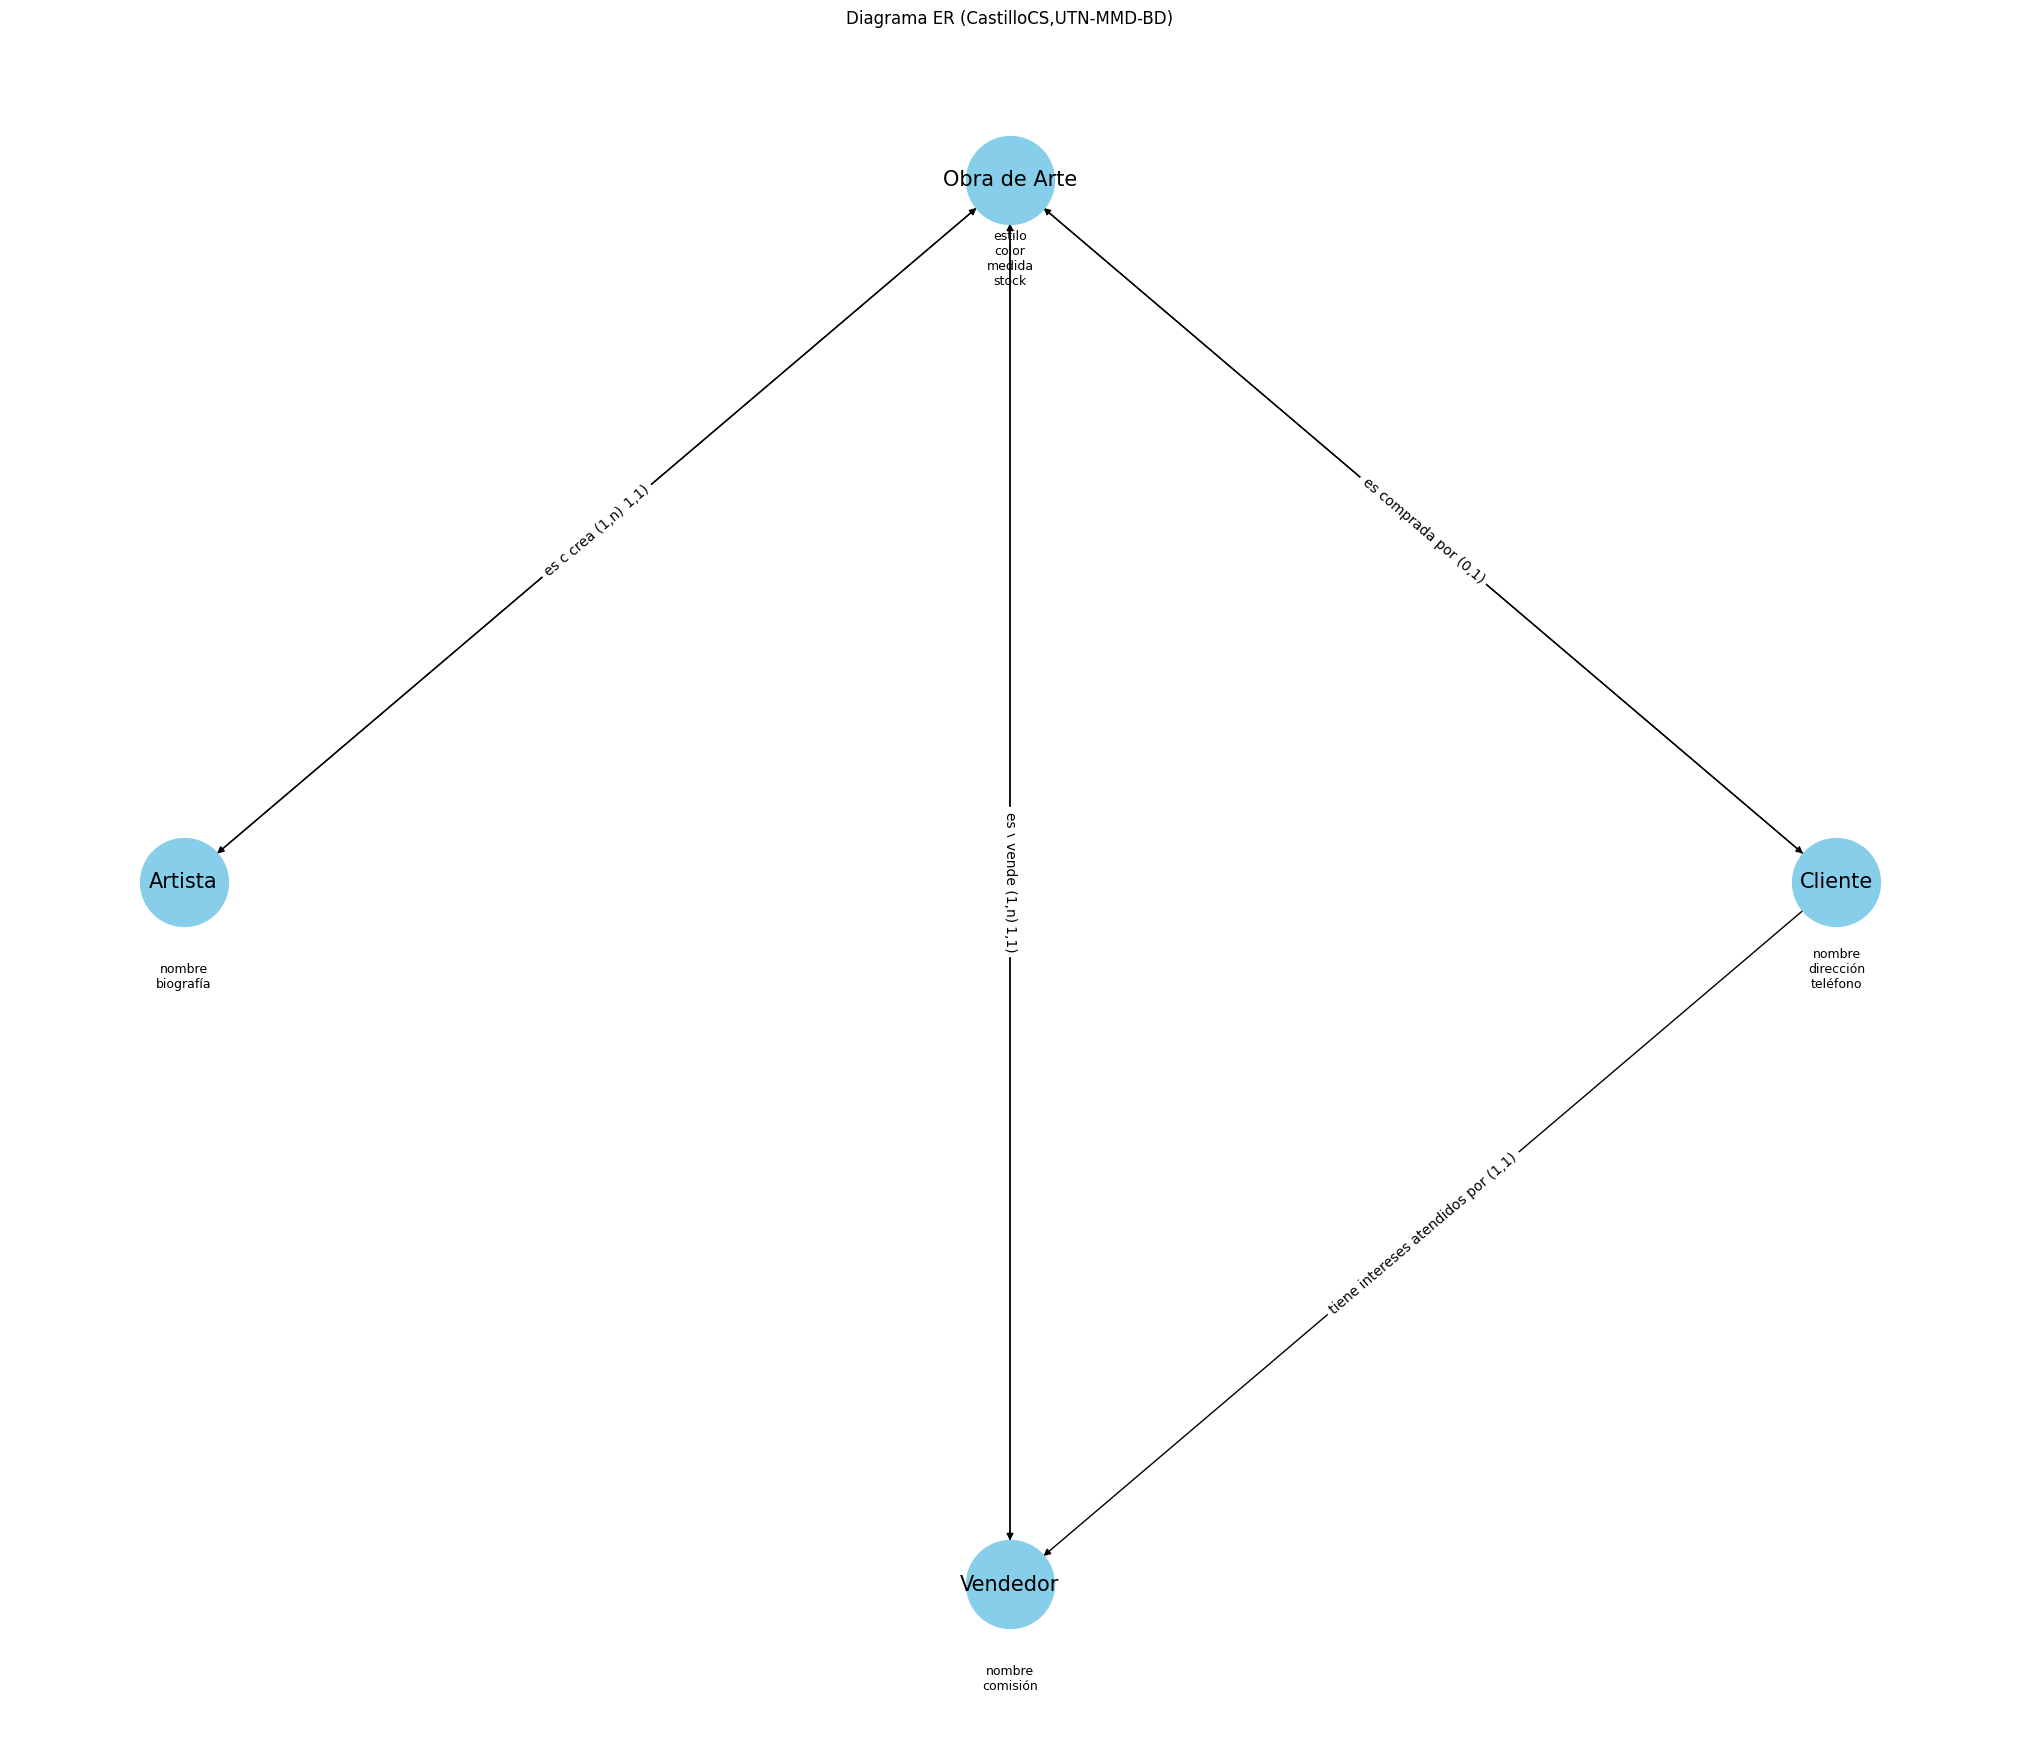

In [31]:
# Ejemplo para probar la función con atributos
graficar_diagrama_er_atributos(relations_with_cardinality_gallery, gallery_attributes, layout_type="circular")

In [32]:
relations_with_cardinality_zapateria = [
    ('Zapato', 'Proveedor', 'es suministrado por (1,1)'),
    ('Proveedor', 'Zapato', 'suministra (1,n)'),
    ('Venta', 'Tipo de Venta', 'está asociada a (1,1)'),
    ('Cliente', 'Venta', 'realiza (1,n)'),
    ('Venta', 'Zapato', 'está asociada a (1,1)'),
    ('Venta', 'Vendedor', 'es acreditada a (1,1)')
]

attributes_zapateria = {
    "Zapato": ["código", "estilo", "color", "medida", "stock"],
    "Proveedor": ["código", "nombre", "contacto"],
    "Tipo de Venta": ["código", "descripción"],
    "Cliente": ["código", "nombre", "dirección", "teléfono", "intereses de compra"],
    "Venta": ["código", "fecha", "cantidad", "tipo"],
    "Vendedor": ["código", "nombre", "porcentaje de comisión"]
}


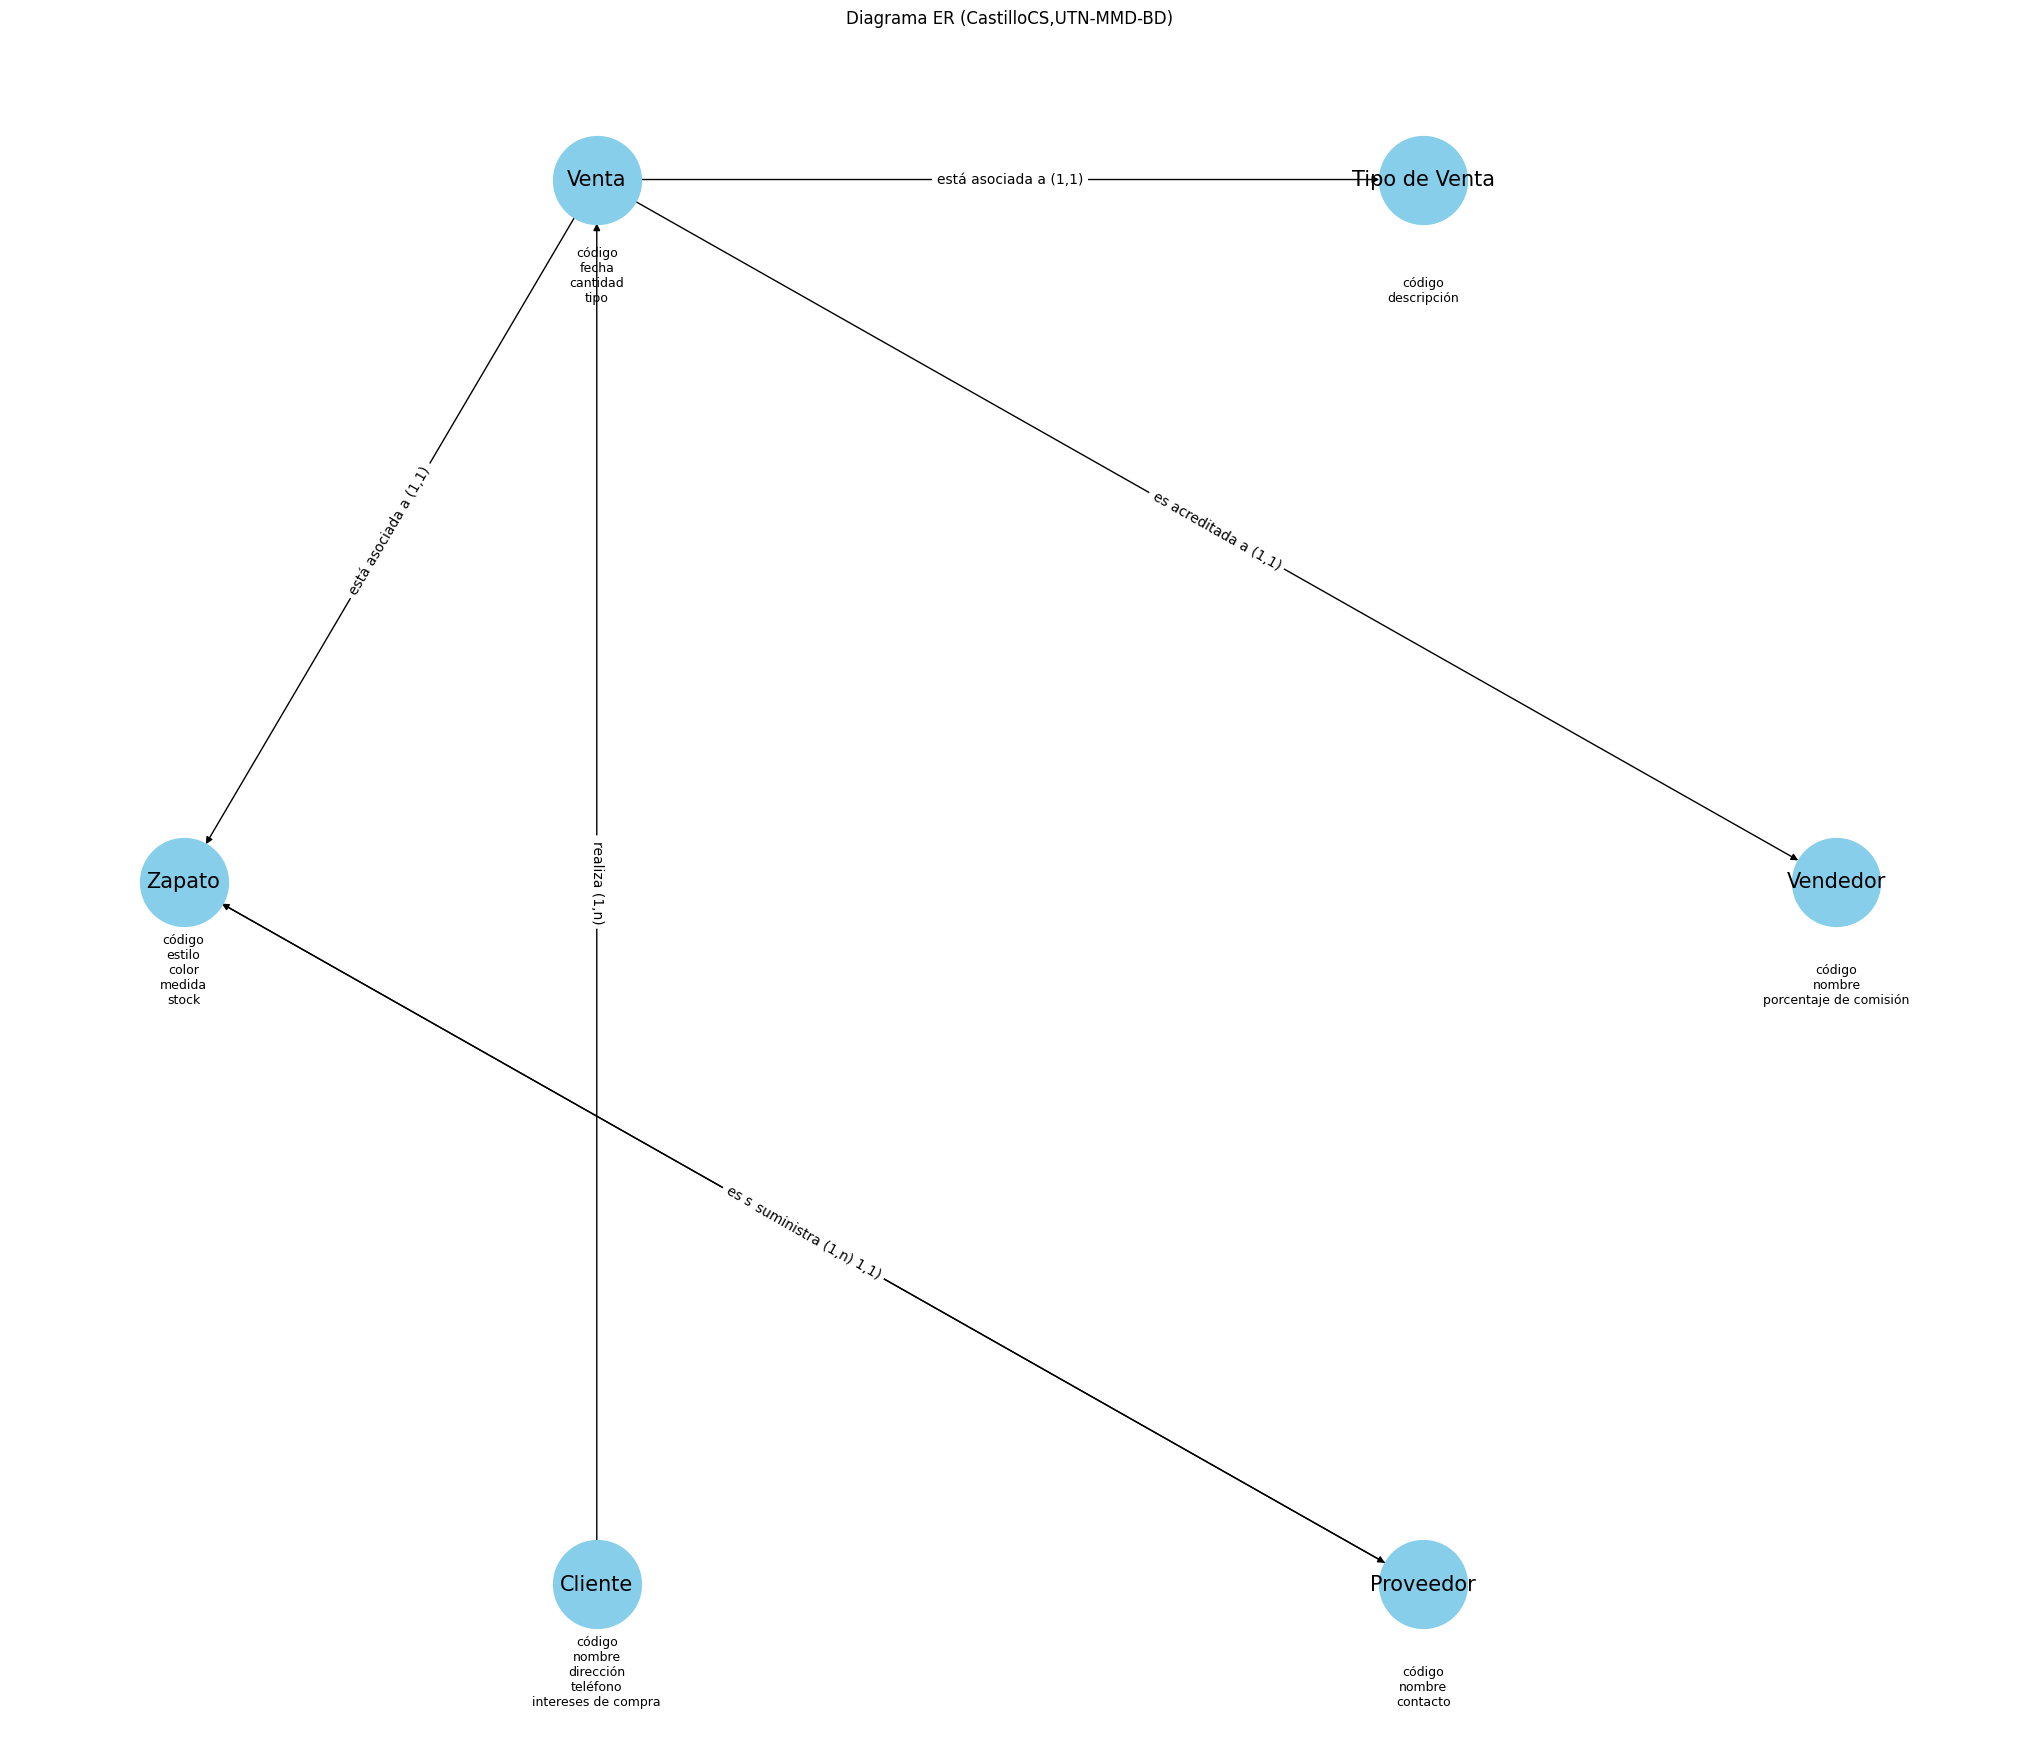

In [33]:
# Ejemplo para probar la función con atributos
graficar_diagrama_er_atributos(relations_with_cardinality_zapateria, attributes_zapateria, layout_type="circular")

In [34]:

relations_with_cardinality_hospital = [
    ('Hospital', 'Sala', 'tiene (1,n)'),
    ('Sala', 'Hospital', 'pertenece a (1,1)'),
    ('Médico', 'Hospital', 'trabaja en (1,1)'),
    ('Hospital', 'Laboratorio', 'trabaja con (1,n)'),
    ('Laboratorio', 'Hospital', 'presta servicios a (1,n)'),
    ('Paciente', 'Sala', 'está internado en (0,1)'),
    ('Paciente', 'Médico', 'es atendido por (1,n)'),
    ('Médico', 'Paciente', 'atiende a (1,n)'),
    ('Paciente', 'Diagnóstico', 'tiene (1,n)')
]

attributes_hospital = {
    "Hospital": ["código", "nombre", "dirección", "teléfono", "cantidad de camas"],
    "Sala": ["código", "nombre", "cantidad de camas"],
    "Médico": ["DNI", "nombre", "especialidad"],
    "Diagnóstico": ["código", "tipo", "complicaciones", "fecha"],
    "Laboratorio": ["código", "nombre", "dirección", "teléfono", "descripción de servicios", "fecha de servicio"],
    "Paciente": ["DNI", "número de registro", "número de cama", "nombre", "dirección", "fecha de nacimiento", "sexo"]
}

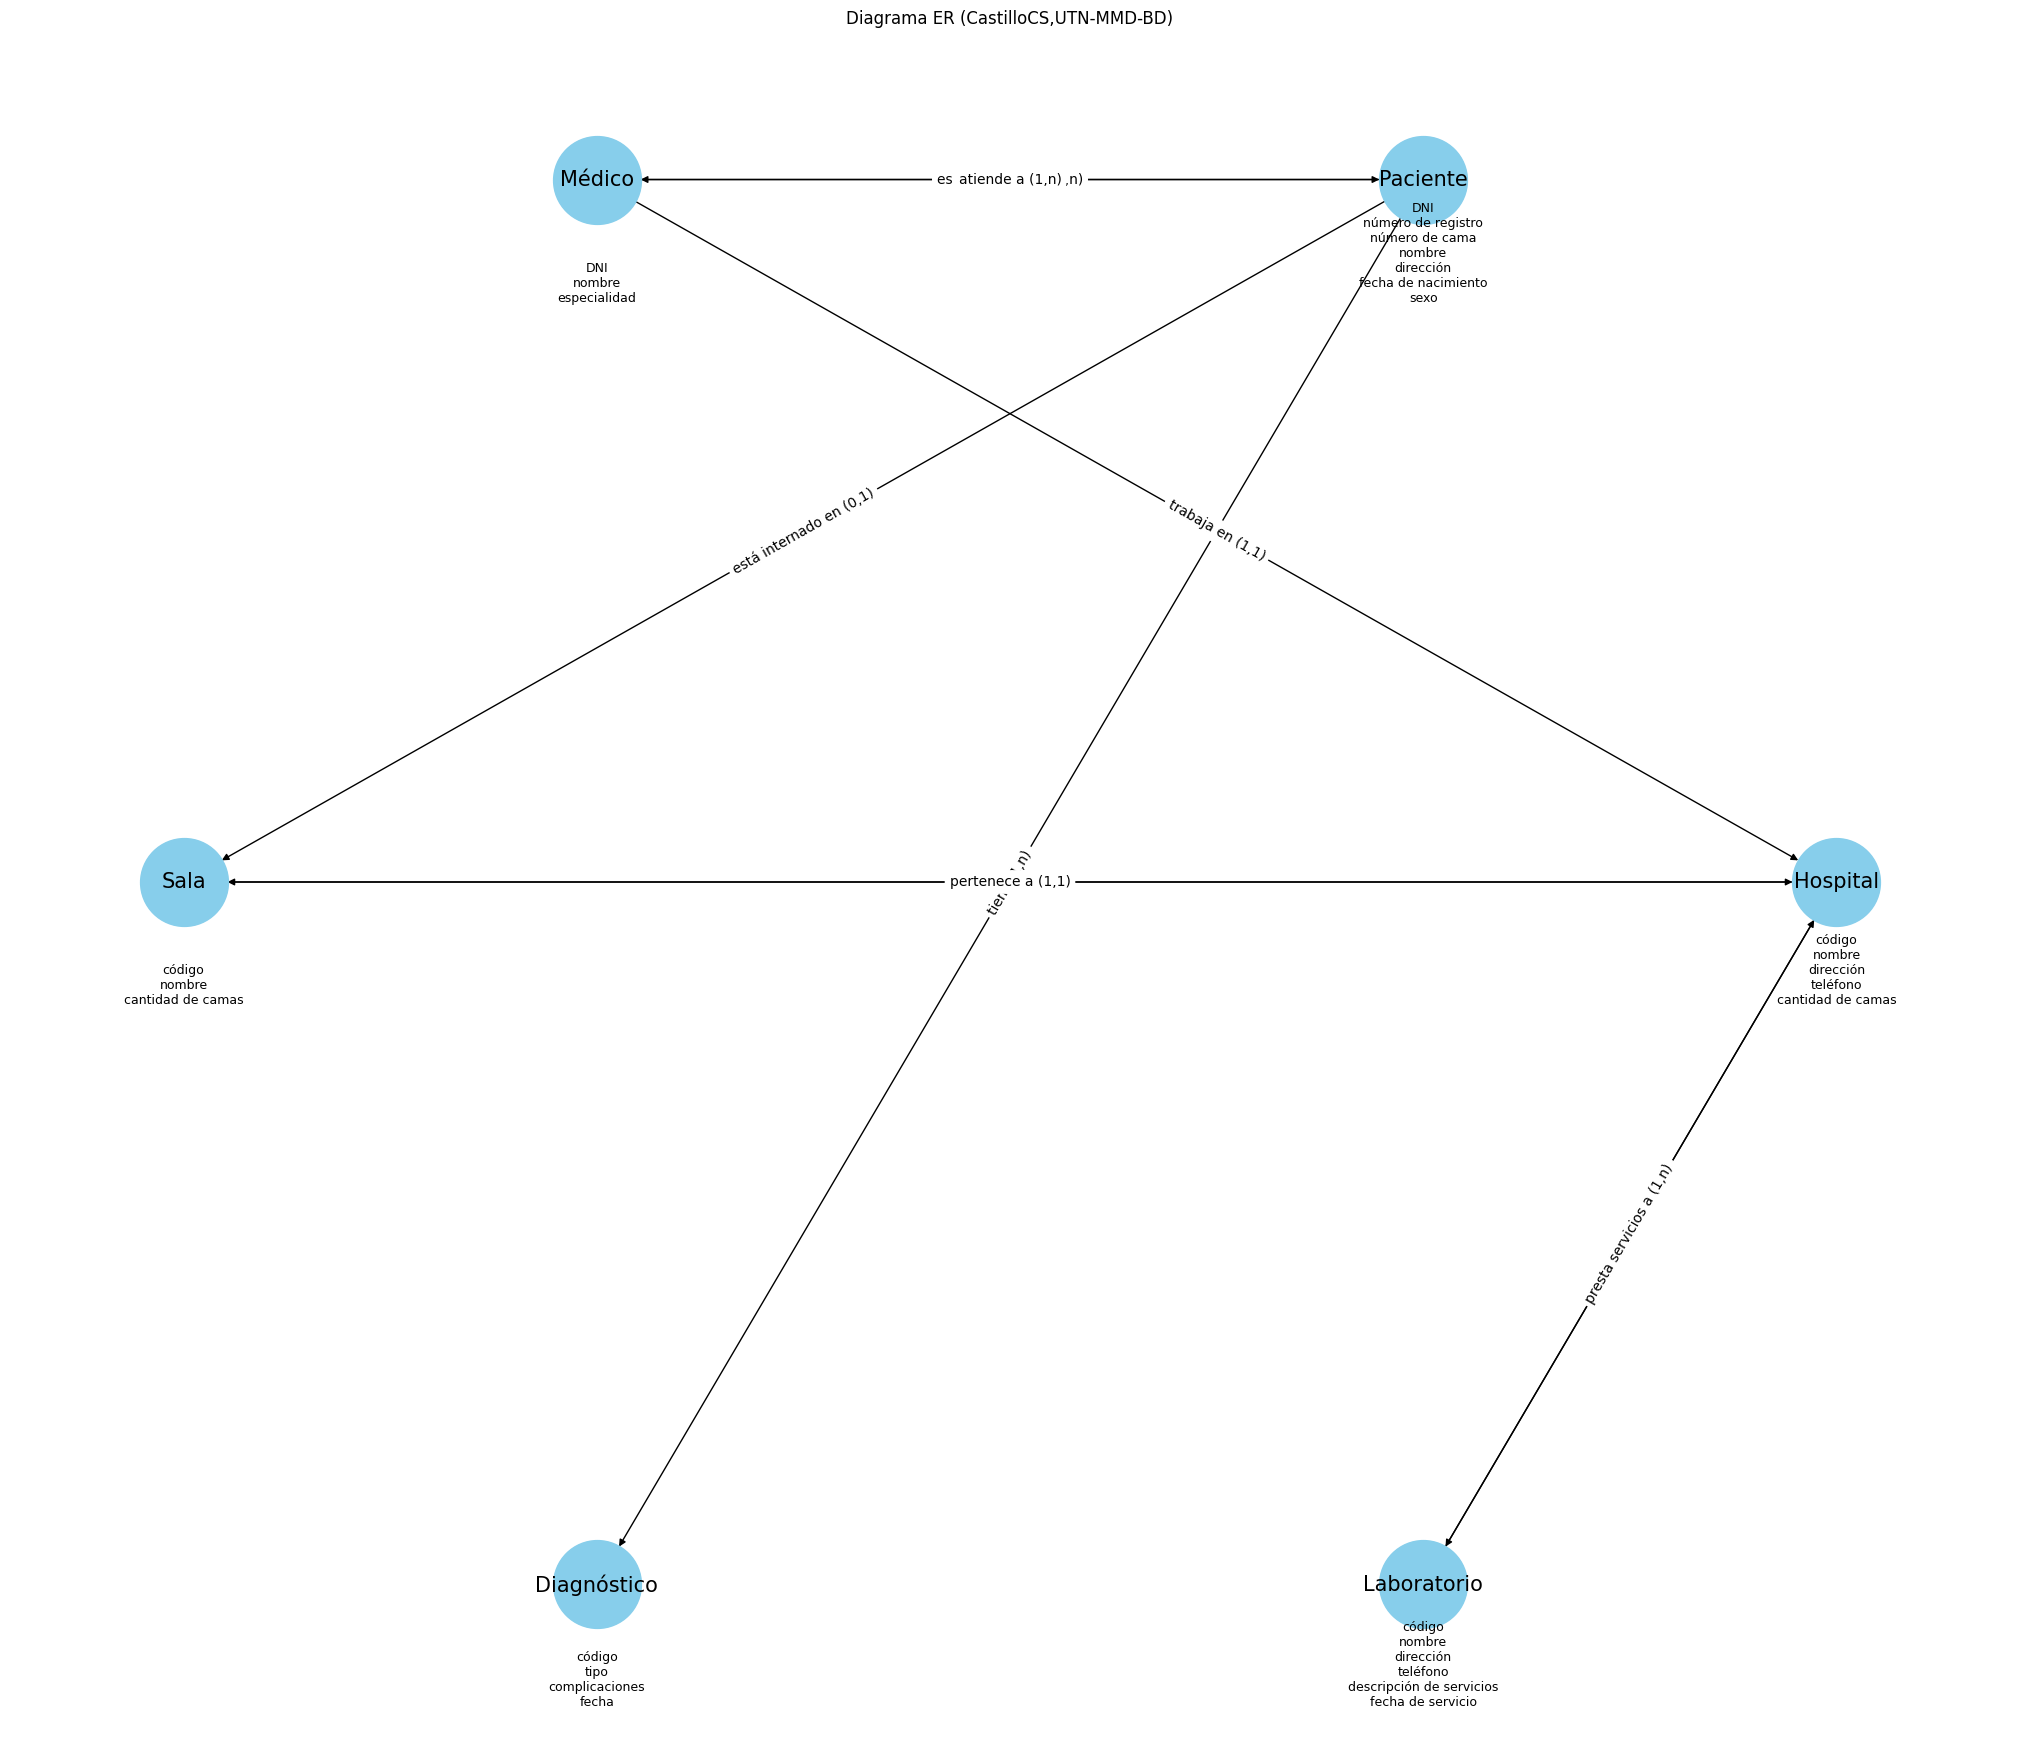

In [35]:
# Ejemplo para probar la función con atributos
graficar_diagrama_er_atributos(relations_with_cardinality_hospital, attributes_hospital, layout_type="circular")

In [36]:
relations_carinality_fabrica = [
    ('Taller', 'Célula', 'tiene (1,n)'),
    ('Célula', 'Taller', 'pertenece a (1,1)'),
    ('Célula', 'Máquina', 'contiene (1,n)'),
    ('Taller', 'Operario', 'tiene asignado (1,n)'),
    ('Célula', 'Operario', 'tiene asignado (1,n)'),
    ('Taller', 'Operario Responsable', 'tiene asignado (0,1)')
]

attributes_fabrica = {
    "Taller": ["código", "descripción"],
    "Célula": ["código", "nombre"],
    "Máquina": ["código", "descripción", "modelo"],
    "Operario": ["DNI", "nombre", "domicilio", "teléfonos"],
    "Operario Responsable": ["DNI", "nombre", "domicilio", "teléfonos"]
}



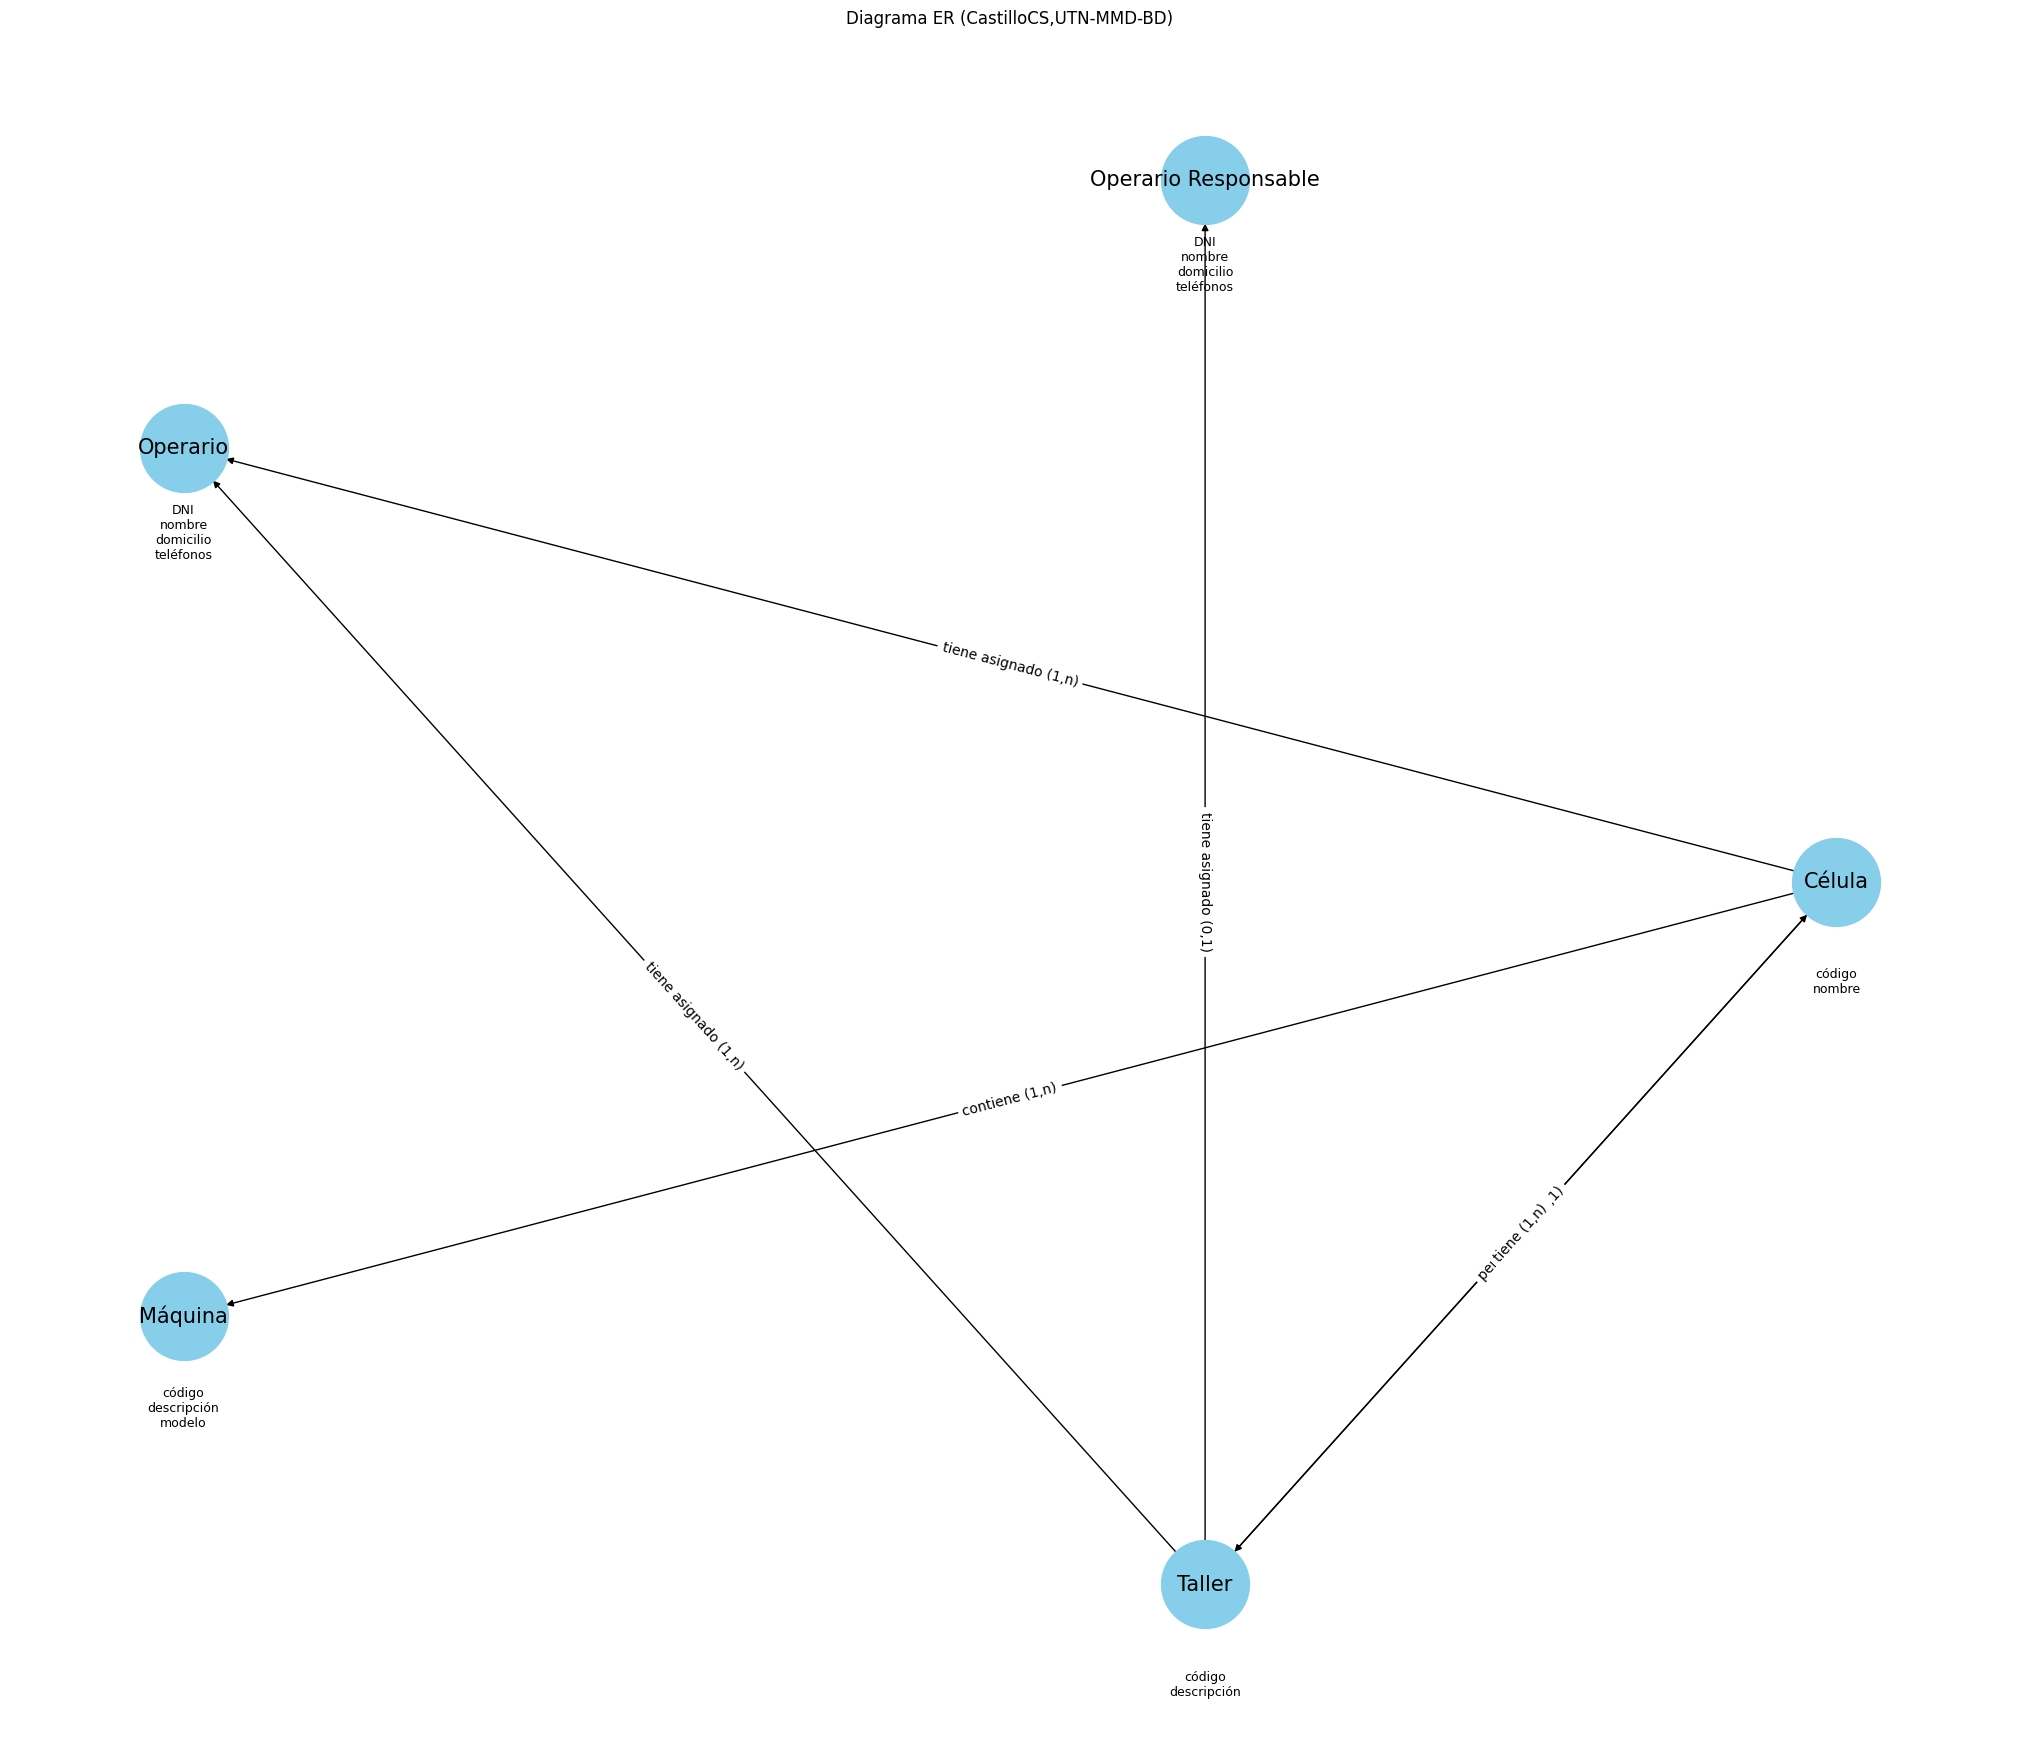

In [37]:
# Ejemplo para probar la función con atributos
graficar_diagrama_er_atributos(relations_carinality_fabrica, attributes_fabrica, layout_type="circular")